In [1]:
import pandas as pd
import numpy as np

## 2.1. Car price project

In [2]:
df = pd.read_csv('car_price.csv')

In [3]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


## 2.2. Data preparation

- We want to predict the price (MSRP)

- Make both columns and data entries consistent

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


To lower case the data entries, we need to filter which columns are data type = object

In [6]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
# Retrieve the index from the series and make it a list
strings = list(df.dtypes[df.dtypes == 'object'].index)

strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for column in strings:
    df[column] = df[column].str.lower().str.replace(' ', '_')

In [10]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


## 2.3. Exploratory data analysis

Iterate over each column and print some information about them

In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])  #first 5 unique values
    print(df[col].nunique())     #total number of unique values

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


### Distribution of price

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

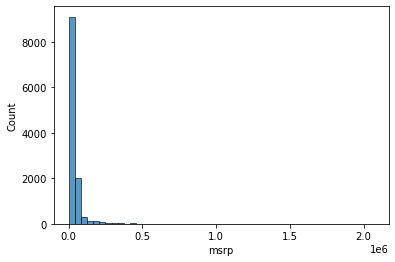

In [13]:
sns.histplot(df['msrp'], bins = 50)

1e6 = 10^6 = 1.000.000 million

Most of the cars are cheap and the remainders are a bit expensive. This is a Long Tail Distribution, because our data is mostly concentrated in an edge of the graphic and the other points form a tail.

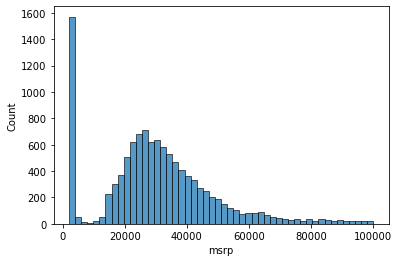

In [14]:
sns.histplot(df['msrp'][df['msrp'] < 100000], bins = 50)

This kind of distribution is very common in prices, most of the things are cheap for general public but few are very expensive ones

**We want to get rid of this long tail ---> apply logarithmic distribution: get more compact values**

In [15]:
#Example

np.log1p([0, 1, 10, 1000, 100000]) #add 1, with log1p, to make sure, in this case, we don't get problems with log(0)

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [16]:
price_logs = np.log1p(df['msrp'])

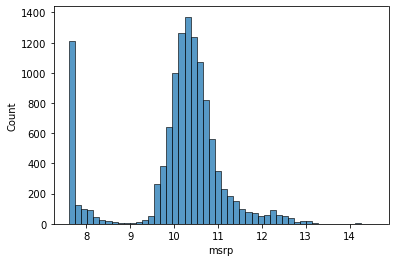

In [17]:
sns.histplot(price_logs, bins = 50)

The tail is gone.

This shape is more similar with a bell shape - normal distribution - in spite of having a peak the left-edge of the graphic.

**This distribution is ideal for models, with a target value looking like this. Long tail distribution typically confuse models**

### Missing Values

In [18]:
df.isnull().sum()[df.isnull().sum() > 0]

engine_fuel_type       3
engine_hp             69
engine_cylinders      30
number_of_doors        6
market_category     3742
dtype: int64

## 2.4. Validation framework

- This step is required to split our data in 3 data sets: train, validation and test

- The split will be 60% train - 20% validation - 20% test

In [19]:
n = len(df)  # total number of rows

n_val = int(n * 0.2) # number of rows for the validation data set
n_test = int(n* 0.2) # number of rows for the test data set
n_train = n - n_val - n_test # number of rows for the train data set

In [20]:
# Check the values

n, n_val + n_test + n_train

(11914, 11914)

In [21]:
n_train, n_val, n_test

(7150, 2382, 2382)

- Now that the size for each data set is known, the next step is to shuffle the dataframe before it is split

In [22]:
# Create an array of size n, containing all the index numbers of our dataframe

idx = np.arange(n)

In [23]:
np.random.seed(2) #to make this reproducable

# This numpy function will allow to shuffle the array, and the random seed will help us keeping the same result on this computer
np.random.shuffle(idx)

In [24]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

- Shuffle the data set

In [25]:
df_shuffled = df.iloc[idx]
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [26]:
df_train = df_shuffled.iloc[:n_train]

df_val = df_shuffled.iloc[n_train:n_train+n_val]

df_test = df_shuffled.iloc[n_train+n_val:]

In [27]:
df_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685


In [28]:
df_val.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650


In [29]:
df_test.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211


In [30]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

- Drop the old indexes

In [31]:
df_train = df_train.reset_index(drop = True)

df_val = df_val.reset_index(drop = True)

df_test = df_test.reset_index(drop = True)

- Apply the logarithmic function to the target variable

In [32]:
np.log1p(df_train['msrp'].values) #numpy array with .values. Without it is a series

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [33]:
y_train = np.log1p(df_train['msrp'].values)

y_val = np.log1p(df_val['msrp'].values)

y_test = np.log1p(df_test['msrp'].values)

- Drop the non-logarithmic values of the price from the 3 data sets to avoid using these prices as a feature during the process

In [34]:
del df_train['msrp']

del df_val['msrp']

del df_test['msrp']

## 2.5. Linear regression

- Look at observation nr 10 from the train data set

In [35]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                    453
engine_cylinders                              12
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                                2
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

- Retrieve the variables engine_hp, milles per gallon and popularity

In [36]:
xi = [453, 11, 86]

In [37]:
# random assigned values to the coefficients

w0 = 7.17
w = [0.01, 0.04, 0.002]

- If we didn't know nothing about the car, the predicted log price would be 7.17

In [38]:
def linear_regression(xi):
    n = len(xi) #number of features
    
    pred = w0 #intersect value
    
    for j in range(n):
        pred = pred + w[j]*xi[j]
    
    return pred

In [39]:
linear_regression(xi)

12.312

- This value of 12.312 is the log(y+1). To undo that, we need to calculate the exponential

In [40]:
np.expm1(12.312)

222347.2221101062

- The prediction for the price of the car is 22 2347,22.

In [41]:
# another quicker way
round (np.expm1(linear_regression(xi)), 2)

222347.22

- w0 is the value that we predict about a car, if we don't know nothing about its caractheristics. It is the **bias term**

- w1 == for each aditional horsepower, the car's price increases by 0.01

- w2 == for every extra mile per gallon, the price is increased by 0.04

- w3 == the more popular the car is, the price is affect by 0.002. Which does not have a big influence

## 2.6. Linear regression - vector form

**Linear Regression Formula:** g(xi) = w0 + w1 * xi1 + w2 * xi2 + w3 * xi3 + .... + wj * xij

g(xi) = w0 + Σ(wj.xij)

- **Σ(wj.xij)** this part of the equation is a dot product. In this case, a vector-vector multiplication

- Start by creating a function for the vector-vector multiplication

In [42]:
def dot(xi, w):
    n = len(xi)
    
    result = 0.0
    
    for j in range(n):
        result = result + xi[j] * w[j]
    
    return result

- By writting a function for the multiplication between the coefficients and their respetive feature, it is possible to write a shorter version for the linear regression function

In [43]:
def linear_regression(xi):
    return w0 + dot(xi, w)

---

- To make this even shorter, we add a new value (1) to the features vector, so it can multiply by the coefficient w0 and therefore keeping its value. 

In [44]:
w_new = [w0] + w # the brackets in w0 append the value to the list [w]

In [45]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [46]:
def linear_regression(xi):
    
    xi = [1] + xi          # Add 1 to the features matrix, to multiply with the w0 coefficient
    
    return dot(xi, w_new)

In [47]:
np.expm1(linear_regression(xi))

222347.2221101062

- The result is the same

---

Generalizing for multiple observations, X now becomes a matrix of size m * n where n is the number of features and m is the number of observations. Each row of X is an observation.

    1   x₁₁   x₁₂   ...   x₁ₙ
    1   x₂₁   x₂₂   ...   x₂ₙ
    ... ...   ...   ...   ...
    1   xₘ₁   xₘ₂   ...   xₘₙ 

We can now multiply X with W to get our predictions

    1   x₁₁   x₁₂   ...   x₁ₙ       w₀        X₁ᵀ·W
    1   x₂₁   x₂₂   ...   x₂ₙ   ·   w₁    =   X₂ᵀ·W 
    ... ...   ...   ...   ...       ...       ...
    1   xₘ₁   xₘ₂   ...   xₘₙ       wₙ        Xₘᵀ·W

The resulting vector Ŷ is the prediction vector.

- Given that, Linear Regression can be written with the notation of a matrix-vector multiplication

In [48]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]  # list of lists

X = np.array(X) # turn list of list into a matrix

X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [49]:
# Predictions using matrix-vector multiplication

X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [50]:
def linear_regression(X):
    
    # new function without adding 1 to the feature matrix because we did it in the previous step
    
    return X.dot(w_new)

In [51]:
np.expm1(linear_regression(X))

array([237992.82334859, 768348.51018973, 222347.22211011])

## 2.7. Training a linear regression model

How to find the best possible coefficients for the Linear Regression model?

Given the formula: **g(X) = X·W ≈ y**

To solve for **w**, multiplying the inverse of X on both terms of the equation:

- X⁻¹ · X · W = X⁻¹ · y

Since : **X⁻¹ · X = I**

- I · W = X⁻¹ · y 

**I is the Identity Matrix and does not change W**

- W = X⁻¹ · y

In most of the cases **X** is a rectangular matrix, therefore it may not have an inverse. Thus, there is a workaround that can be done with the **Transpose** and use it to obtain the **Gram Matrix**

- Xᵀ · X · W = Xᵀ · y

**Xᵀ · X -> Gram matrix**

- (Xᵀ · X)⁻¹ · Xᵀ · X · W = (Xᵀ · X)⁻¹ · Xᵀ· y

Since: **Xᵀ · X)⁻¹ · Xᵀ · X = I**

- W = (Xᵀ · X)⁻¹ · Xᵀ · y

In [65]:
# Use a new matrix X

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [168, 23, 436],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 96],
    [138, 54, 185],
    [142, 25, 431],
    [453, 351, 86],
]                          # list of lists

X = np.array(X)            # turn list of list into a matrix

X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 168,   23,  436],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   96],
       [ 138,   54,  185],
       [ 142,   25,  431],
       [ 453,  351,   86]])

- Add the bias term

In [53]:
# To find the size of the array
X.shape[0]

9

In [54]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

- Add the bias term to the X matrix

In [55]:
X = np.column_stack([ones, X])

X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.680e+02, 2.300e+01, 4.360e+02],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 9.600e+01],
       [1.000e+00, 1.380e+02, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.510e+02, 8.600e+01]])

Apply **(Xᵀ · X)⁻¹ · Xᵀ · y**

- Tranpose: **(Xᵀ · X)**

In [56]:
XTX = X.T.dot(X)

- Inverse: **(Xᵀ · X)⁻¹**

In [57]:
XTX_inv = np.linalg.inv(XTX)

- **(Xᵀ · X)⁻¹ · Xᵀ**

In [58]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1., -0.],
       [-0.,  0., -0.,  1.]])

In [59]:
# Random values for y

y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

- **(Xᵀ · X)⁻¹ · Xᵀ · y**

In [60]:
w_full = XTX_inv.dot(X.T).dot(y)

In [61]:
w0 = w_full[0]
w = w_full[1:]

In [62]:
w0, w

(16010.013894811484, array([  8.10377303, -22.15656115,  -0.03570234]))

w0 is the bias term, the price of the car if any of the carachteristics are known

In [63]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    #return a tuple with the bias and the weights
    return w_full[0], w_full[1:]

In [66]:
# Re-Use the matrix X to remove the pre-processing phase where the ones were added

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [168, 23, 436],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 96],
    [138, 54, 185],
    [142, 25, 431],
    [453, 351, 86],
]                          # list of lists

X = np.array(X)            # turn list of list into a matrix

X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 168,   23,  436],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   96],
       [ 138,   54,  185],
       [ 142,   25,  431],
       [ 453,  351,   86]])

In [67]:
train_linear_regression(X, y)

(16010.013894811484, array([  8.10377303, -22.15656115,  -0.03570234]))

## 2.8. Car price baseline model

- Build a model only with numerical variables

In [68]:
df_train.dtypes[df_train.dtypes != 'object']

year                  int64
engine_hp           float64
engine_cylinders    float64
number_of_doors     float64
highway_mpg           int64
city_mpg              int64
popularity            int64
dtype: object

In [69]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [70]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [71]:
X_train = df_train[base].values

X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [72]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [73]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

There are nan in the solution because there are missing values in the train data set.

In [74]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

Filling the NaN with zeros, is telling the model to ignore this features.

g(xi) = w0 + w1 * xi1 + w2 * xi2 + ....

- If xi1 = 0

g(xi) = w0 + w2 * xi2 + ....

It does not make must sense for a car to have zero horse power, or a car to have zero cylinders. From a common sense point of view does not make sense but from pratical point of view, when it comes to ML sometimes zero works fine.

**Business Context** always matters!

There are other methods like fill with mean or values from neighbours.

In [75]:
X_train = df_train[base].fillna(0).values

In [76]:
train_linear_regression(X_train, y_train)

(7.927257388069998,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [77]:
w0, w = train_linear_regression(X_train, y_train)

In [78]:
w0, w

(7.927257388069998,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

- The parameters are ready to be used to get the predictions

In [79]:
# y_pred from the training data set

y_pred = w0 + X_train.dot(w)

Text(0, 0.5, 'Number of Cars')

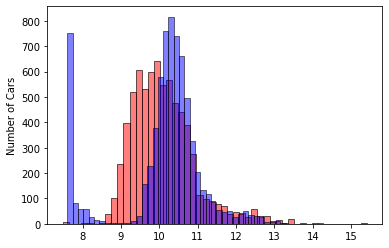

In [80]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)

sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

plt.ylabel('Number of Cars')

- **It seems the predicted values are below the real values. At first glance, the model does not seem ideal**

## 2.9. Root mean squared error

In [81]:
def rmse(y, y_pred):
    
    #error = y - y_pred
    #se = error ** 2
    mse = ((y - y_pred) ** 2).mean()
    
    return np.sqrt(mse) 

In [82]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.10. Computing rmse on validation data

- The columns were defined above

In [83]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

- The next function, **prepare_X**, can be used to prepare the train, valid and test data sets.

In [84]:
def prepare_X(df):
    # pick the numeric columns
    df_num = df[base]               
    
    # fill the null values
    df_num = df_num.fillna(0)       
    
    # extract the feature matrix to a numpy array
    X = df_num.values               
    
    return X

In [85]:
#train data set
X_train = prepare_X(df_train)

#coeficients 
w0, w = train_linear_regression(X_train, y_train)

In [86]:
#validation data set
X_val = prepare_X(df_val)

#predictions using the feature matrix computed from the validation data set
y_pred = w0 + X_val.dot(w)

- Using the y_val that existed when the data set was splitted in 60%-20%-20%

In [87]:
y_val

array([10.19936098, 10.90872279,  9.72770457, ..., 11.21756062,
        9.77542688, 10.1924563 ])

- **Compute the Root Mean Square Error**

In [88]:
rmse(y_val, y_pred)

0.7616530991301591

## 2.11. Feature engineering 

**A simple approach in feature engineer to try to improve the model**

- Is common sense that the year of a car is an important variable to determine is price

In [89]:
df_train['year'].max()

2017

- The data was collected in 2017

In [90]:
2017 - df_train['year']

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

- Add this new variable age, to the Prepare_X function that pre-processes the data sets

In [91]:
def prepare_X(df):
    df = df.copy()      # I only work with a copy of my data set inside this function. This allows me to keep my original data
                        # Avoiding that this functions changes my data
        
    df['age'] = 2017 - df['year']
    
    features = base + ['age']
    
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X

In [92]:
X_train = prepare_X(df_train)

In [93]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [94]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058329

- The model improve with the RMSE going from 0.76 to 0.51!

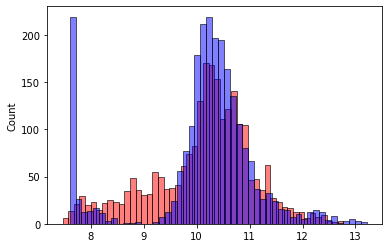

In [95]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

## 2.12. Categorical variables

- Variables that are not a number, even it they seem at first glance.

- The number of doors should be categorical instead of numerical

In [96]:
df_train['number_of_doors'] == 2

0        True
1       False
2       False
3       False
4       False
        ...  
7145     True
7146     True
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

- Need to pass an astype to turn the boleeans in 1 and 0

In [97]:
(df_train['number_of_doors'] == 2).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int32

- Need to apply this to the all possible number of doors and write it back to a data frame

In [98]:
# Example
'num_doors_%s' % 3

'num_doors_3'

In [99]:
df_train['number_of_doors'].unique()

array([ 2.,  4.,  3., nan])

In [100]:
#for value in [2, 3, 4]:
    #df_train['num_of_doors_%s' % value] = (df_train['number_of_doors'] == value).astype('int')

- It is tested, now add to the prepare_X function

In [101]:
def prepare_X(df):
    df = df.copy()      # I only work with a copy of my data set inside this function. This allows me to keep my original data
    features = base.copy()                    # Avoiding that this functions changes my data
        
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for value in [2, 3, 4]:
        df['num_of_doors_%s' % value] = (df['number_of_doors'] == value).astype('int')
        features.append('num_of_doors_%s' % value)  # want to add these features to the list of features to put it in the matrix X down below
    
    
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X

In [102]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

- The new columns already appear in the matrix

In [103]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502988

- The improve was very small, just by almost 0.002.
- The number of doors is not a very usefull feature

- Try with a new one: **make**

In [104]:
df['make'].nunique()

48

- There are 48 different manufactors

In [105]:
df['make'].value_counts()[:5]

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

- Retrieve the top 5

In [106]:
list(df['make'].value_counts()[:5].index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [107]:
makes = list(df['make'].value_counts()[:5].index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

- Add to the prepare_X

In [108]:
def prepare_X(df):
    df = df.copy()      # I only work with a copy of my data set inside this function. This allows me to keep my original data
    features = base.copy()                    # Avoiding that this functions changes my data
        
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for value in [2, 3, 4]:
        df['num_of_doors_%s' % value] = (df['number_of_doors'] == value).astype('int')
        features.append('num_of_doors_%s' % value)  # want to add these features to the list of features to put it in the matrix X down below
    
    for value in makes:
        df['make_%s' % value] = (df['make'] == value).astype('int')
        features.append('make_%s' % value)
    
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X

In [109]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849555213

- Another improvement in the RMSE

- Look at the remaining categorical variables

In [110]:
df_train.dtypes[df_train.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [111]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

- Create a similar process to the one with 'make'. Retrieve the top 5 of each category

In [112]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [113]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

- Add all the categorical variables to the prepare_X function

In [114]:
def prepare_X(df):
    df = df.copy()      # I only work with a copy of my data set inside this function. This allows me to keep my original data
    features = base.copy()                    # Avoiding that this functions changes my data
        
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for value in [2, 3, 4]:
        df['num_of_doors_%s' % value] = (df['number_of_doors'] == value).astype('int')
        features.append('num_of_doors_%s' % value)  # want to add these features to the list of features to put it in the matrix X down below
    
    for value in makes:
        df['make_%s' % value] = (df['make'] == value).astype('int')
        features.append('make_%s' % value)
    
    for c, values in categories.items():
        for v in values:  
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X

In [115]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

5874.131804281492

- The model got a lot worse.

In [116]:
w0, w

(6967185524252272.0,
 array([ 2.61558143e+01, -5.18933823e+03, -4.53959894e+02, -1.88226849e+02,
        -5.22973887e-01,  5.11961596e+01,  1.63926606e+03,  1.04089644e+03,
         1.64692292e+03, -4.75443072e+16,  2.26920002e+18,  7.60708916e+17,
         2.46644671e+18, -7.45986788e+17,  4.75443072e+16, -2.26920002e+18,
        -7.60708916e+17, -2.46644671e+18,  7.45986788e+17,  6.93254641e+02,
         6.65329797e+02,  6.30044316e+02,  6.29726287e+02,  8.53747475e+02,
        -2.56727707e+15, -2.56727707e+15, -2.56727707e+15, -2.56727707e+15,
        -2.56727707e+15, -4.39990845e+15, -4.39990845e+15, -4.39990845e+15,
        -4.39990845e+15, -2.30458487e+00, -5.81590947e+00,  8.71819202e-01,
         6.15105149e+00, -1.33788559e+00, -1.43955625e+02, -1.46532571e+02,
        -1.46093047e+02, -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,
         3.41906701e-01, -1.64412078e-01]))

- Some coefficients are very large, either positive or negative

## 2.13. Regularization

Sometimes, the inverse of the Gram Matrix does not exist. Usually, that happens when the matrix X has duplicated features

In [117]:
# In this matrix, the 2nd and 3rd columns have the same values

X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [118]:
X.T.dot(X)

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

When two columns have the same values, in linear algebra, is not possible to compute the inverse of that matrix

In [119]:
XTX = X.T.dot(X)
np.linalg.inv(XTX)

LinAlgError: Singular matrix

- This error was not the case in the car prediction model

- Let's add noise in to the matrix, and change one number by a very small amount

In [120]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 500000001, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 5.00000000e+00],
       [5.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.00000000e+00, 4.00000000e+00, 4.00000000e+00],
       [7.00000000e+00, 5.00000001e+08, 5.00000000e+00],
       [4.00000000e+00, 5.00000000e+00, 5.00000001e+00]])

In [121]:
X.T.dot(X)

array([[1.40000000e+02, 3.50000008e+09, 1.11000000e+02],
       [3.50000008e+09, 2.50000001e+17, 2.50000009e+09],
       [1.11000000e+02, 2.50000009e+09, 1.08000000e+02]])

- With noisy data, there can be features that are very similar- This matrix is not exactly singular anymore. The third column is not a duplicated of the second, and vice-versa

- It become numerically invertable

In [122]:
XTX = X.T.dot(X)
XTX

array([[1.40000000e+02, 3.50000008e+09, 1.11000000e+02],
       [3.50000008e+09, 2.50000001e+17, 2.50000009e+09],
       [1.11000000e+02, 2.50000009e+09, 1.08000000e+02]])

In [123]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 4.67079347e-02, -2.26223975e-10, -4.27687110e-02],
       [-2.26223975e-10,  6.30050657e-18,  8.66629096e-11],
       [-4.27687110e-02,  8.66629096e-11,  5.12099041e-02]])

In [124]:
y = [1, 2, 3, 1, 2, 3]

In [125]:
XTX_inv.dot(X.T).dot(y)

array([ 4.22059651e-01, -2.38154194e-09,  4.72706838e-02])

- In spite of being invertable, the distortion in the training data leads to huge errors

- To solve this problem, add a small number to the diagonal of the Xᵀ · X matrix

- Test with a smaller example

In [126]:
# Second column is a similar duplicate of the third column

XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [127]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33366691e-01,  3.33350007e-01,  3.33350007e-01],
       [ 3.33350007e-01,  5.00492166e+03, -5.00508835e+03],
       [ 3.33350007e-01, -5.00508835e+03,  5.00492166e+03]])

- **The larger the number we had to the diagonal, the more control we have on the weights**

In [128]:
XTX = [
    [1.01, 2, 2],
    [2, 1.01, 1.0000001],
    [2, 1.0000001, 1.01]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

- To implement regularization create an identity matrix with np.eye()
- Multiply it with the regularization parameter 
- Add the resultant matrix to the Gram Matrix

In [129]:
XTX = XTX + (0.01 * np.eye(3))
XTX

array([[1.02     , 2.       , 2.       ],
       [2.       , 1.02     , 1.0000001],
       [2.       , 1.0000001, 1.02     ]])

- When inverted, the problem disappears

In [130]:
np.linalg.inv(XTX)

array([[ -0.34009026,   0.33672302,   0.33672302],
       [  0.33672302,  24.91426063, -25.08598937],
       [  0.33672302, -25.08598937,  24.91426063]])

- **Need to change the function that was used to calculate the weights**

In [131]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + (r * np.eye(XTX.shape[0]))
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [132]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45652200349509503

- The model improved, and even better than the non-regularized form before it had the encoded variables

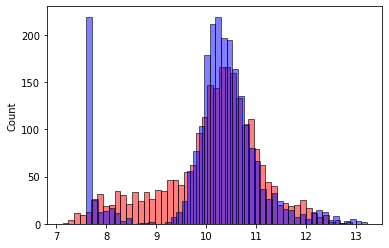

In [133]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

## 2.14. Tuning the model

- Do a loop to find the best value for the regularization parameter

In [134]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 6967185524252272.0 5874.131804281492
1e-05 6.556600393369702 0.45651703555629075
0.0001 6.247626719886016 0.4565170662267404
0.001 6.286067231721486 0.4565175099203529
0.1 6.191208153557908 0.45656941113935046
1 5.634887405854673 0.45722192577838183
10 4.283807919538178 0.4701725863389962


In [135]:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
    
score

0.4565175099203529

## 2.15. Using the model

So far, the procedure has been:
- Training the model on the train data set
- Apply it to validation data set and get the RMSE

Now:
- Use the the train and the validation data set together to train the model 
- Make the final validation using the test set and check the RMSE

Combine the data sets using concat: takes a list of data sets and combines them

In [136]:
# pandas - concat
df_full_train = pd.concat([df_train, df_val])

In [137]:
df_full_train = df_full_train.reset_index(drop = True)

In [138]:
df_full_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031


- Use the prepare_X function to obtain the feature matrix

In [139]:
X_full_train = prepare_X(df_full_train)

In [140]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

- To train the model, we also need the vector y

In [141]:
# numpy - concatenate, works similar to pd.concat. There is no index, so no need to reset
y_full_train = np.concatenate([y_train, y_val]) 

In [142]:
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

- Train the model and use the r parameter that was obtained with the train-val framework

In [143]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [144]:
w0, w

(6.322641588031537,
 array([ 1.52506348e-03,  1.18188694e-01, -6.66105578e-03, -5.33413789e-03,
        -4.87603774e-05, -9.69091850e-02, -7.92621780e-01, -8.90863006e-01,
        -6.35101714e-01, -2.07169609e-02,  8.77805667e-02, -2.89044453e-04,
        -5.02819551e-02, -4.63775094e-02, -2.07169670e-02,  8.77805654e-02,
        -2.89042642e-04, -5.02819597e-02, -4.63775060e-02, -4.66859024e-01,
         7.98660527e-02, -3.16047598e-01, -5.51981581e-01, -7.89524495e-02,
         1.09453132e+00,  9.19223781e-01,  1.14880119e+00,  2.65193702e+00,
         5.09160334e-01,  1.62942904e+00,  1.53013310e+00,  1.61731183e+00,
         1.54531121e+00, -9.70559858e-02,  3.73062197e-02, -5.81767427e-02,
        -2.35940757e-02, -1.19357259e-02,  2.18895262e+00,  2.07458271e+00,
         2.05916687e+00, -5.00802804e-02,  5.62184612e-02,  1.84794027e-01,
         3.32646152e-01, -1.58817030e-01]))

- Now, need to prepare the test data set, the same way that it was done with the validation data set

In [145]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
    
score

0.45177493014128994

- The result was similar to the one obtained in the validation data set (0.457 vs 0.452)

- This is a good sign. It means the model can generalize well

**Now, that we have a model, we can use the final model to predict the price of a specific car**

- Use a car from the test set, which is okay because it wasn't use in training

In [146]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                          266
engine_cylinders                     6
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                      4
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

- Turn this into a dictionary: similar form of a request

In [148]:
car = df_test.iloc[20].to_dict()

car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

- Transform the dictionary in a data frame, because is the format required in the prepare_X function to retrieve the features

In [149]:
df_small = pd.DataFrame([car])

df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [151]:
X_small= prepare_X(df_small)

X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [153]:
y_pred = w0 + X_small.dot(w)

y_pred = y_pred[0] # This step is redundant, because in this case there is only one prediction

y_pred

10.462651632788624

In [154]:
np.expm1(y_pred)

34983.19380125704

- A car with this caractheristics should cost 34983 

In [156]:
np.expm1(y_test[20])

35000.00000000001

- The prediction is close to the real price of the car